# Primer clustering con scikit-learn

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías y carga de datos de prueba

In [28]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [30]:
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

In [31]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [32]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax=ax
        )

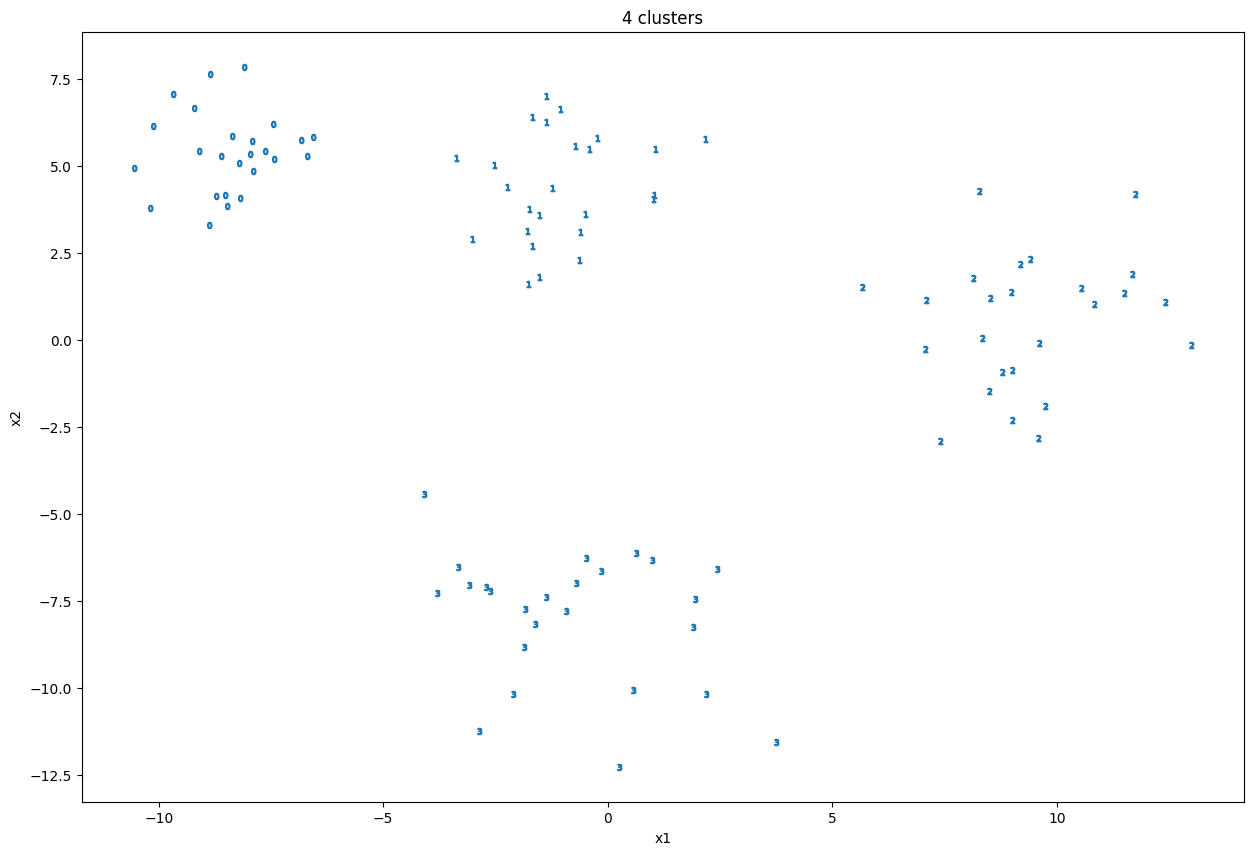

In [33]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
x, y = df_blobs[['x1','x2']], df_blobs['y']
plot_2d_clusters(x,y,ax)
                      

## Aplicando clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [36]:
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'KMeans 5 clusters')

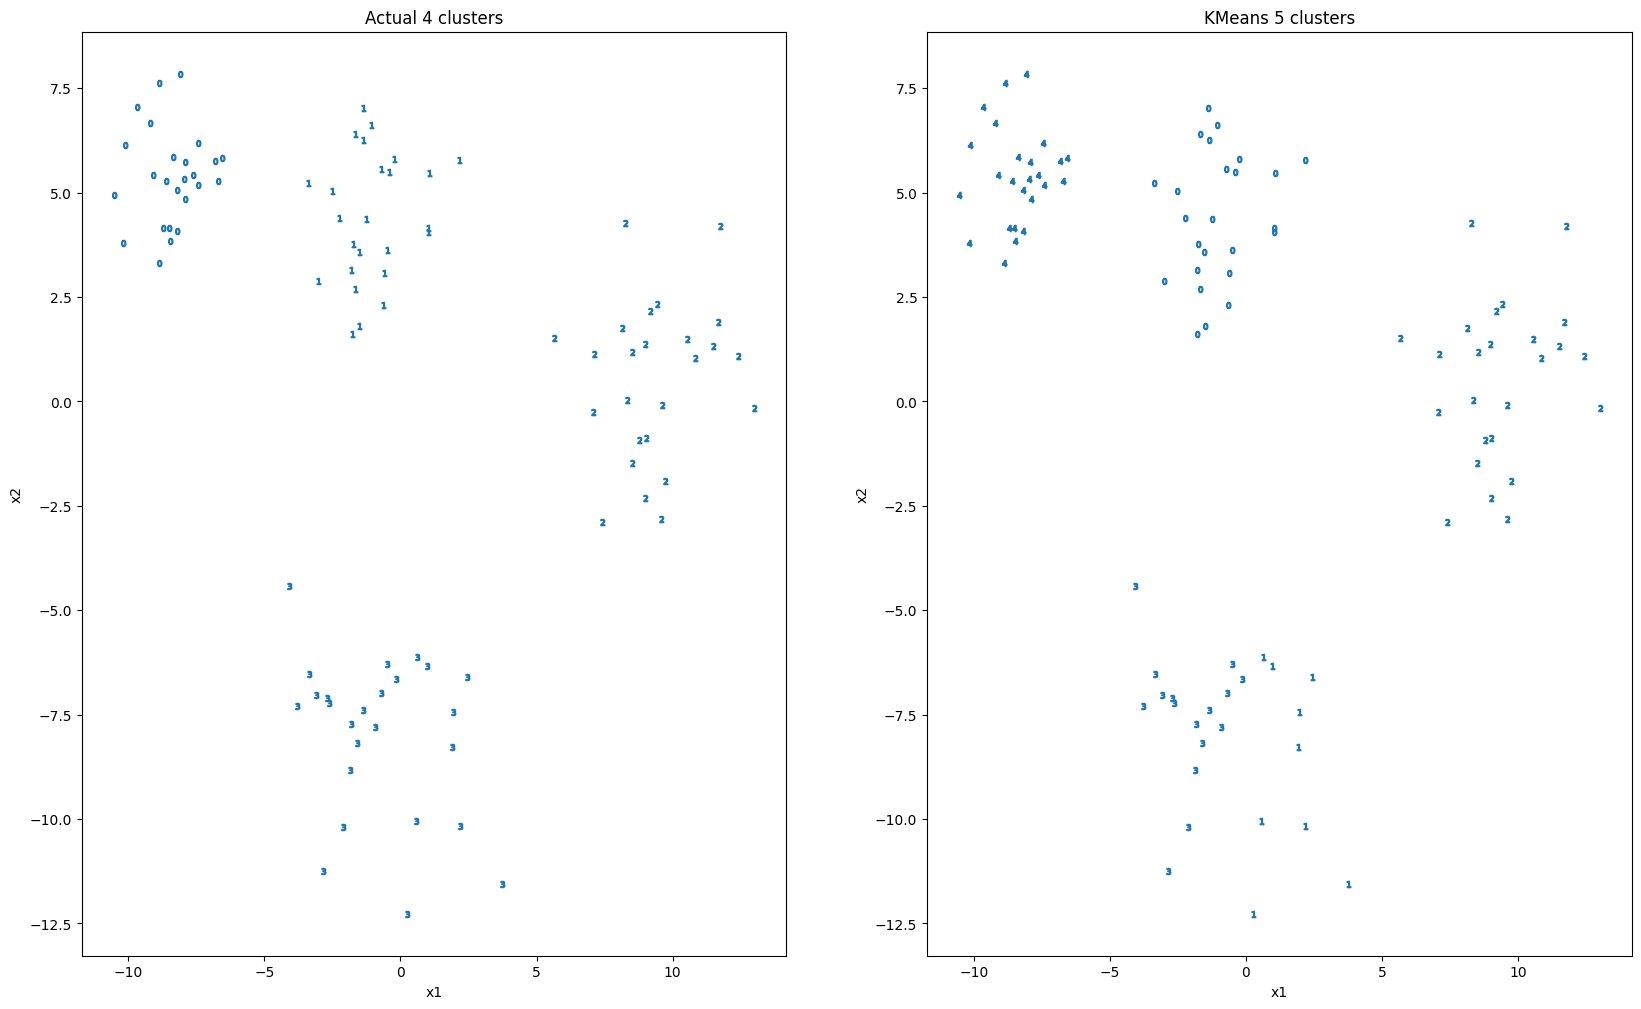

In [37]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'KMeans {axs[1].get_title()}')
